# Training Loop

Based on the following guide: [Based on the following guide](https://www.tensorflow.org/guide/basic_training_loops)

## Setup

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Data

### Define True Function

In [3]:
class LinFunc:
    def __init__(self, w, b):
        self.w = w
        self.b = b
    def __call__(self, x):
        return x * self.w + self.b
    def __repr__(self) -> str:
        return f"x -> x * {self.w} + {self.b}"

f = LinFunc(1.5, 2.5)

### Generate Test Data

In [4]:
data_count = 50
x = tf.linspace(-2, 2, data_count)
x = tf.cast(x, tf.float32)

noise = tf.random.normal(shape=[data_count])
y = f(x) + noise

### Visualize Data

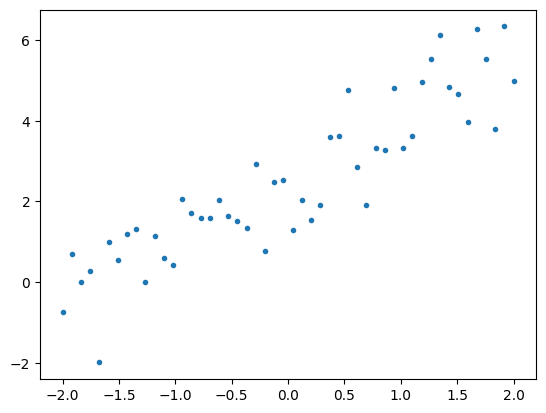

In [5]:
plt.plot(x, y, '.')
plt.show()

## Define Model

In [6]:
class Model(tf.Module):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(0.0, name="w")
        self.b = tf.Variable(0.0, name="b")
    
    def __call__(self, x):
        return self.w * x + self.b
    
model = Model()
print(model.trainable_variables)

(<tf.Variable 'b:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'w:0' shape=() dtype=float32, numpy=0.0>)


## Define Loss Function

In [7]:
def loss(actual_y, expected_y):
    return tf.reduce_mean(tf.square(actual_y - expected_y))

## Define Train Cycle

In [8]:
def train(model, x, y, learning_speed, calculate_loss):
    with tf.GradientTape() as tape:
        current_loss = calculate_loss(model(x), y)
    gradient = tape.gradient(current_loss, model.trainable_variables)
    for var, diff in zip(model.trainable_variables, gradient):
        var.assign_sub(diff * learning_speed)
    return current_loss.numpy()

In [9]:
from dataclasses import dataclass
from typing import Sequence

@dataclass
class Report:
    loss: Sequence[float]
    w: Sequence[float]
    b: Sequence[float]


def train_loop(model, x, y, learning_speed=0.1, calculate_loss=loss, epochs=10) -> Report:
    loss = []
    w = []
    b = []
    for _ in range(epochs):
        current_loss = train(model, x, y, learning_speed, calculate_loss)
        loss.append(current_loss)
        w.append(model.w.numpy())
        b.append(model.b.numpy())
    return Report(loss, w, b)

## Train Model

In [10]:
epochs = 30
model = Model()
report = train_loop(model, x, y, epochs=epochs)

## Display Results

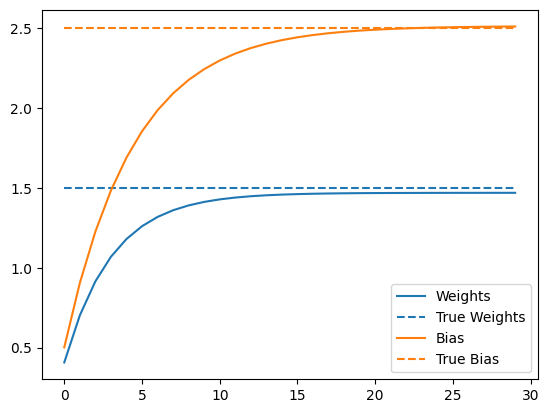

In [11]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(range(epochs), report.w, label="Weights", color=colors[0])
plt.plot(range(epochs), [f.w]*epochs, "--", label="True Weights", color=colors[0])
plt.plot(range(epochs), report.b, label="Bias", color=colors[1])
plt.plot(range(epochs), [f.b]*epochs, "--", label="True Bias", color=colors[1])
plt.legend()
plt.show()

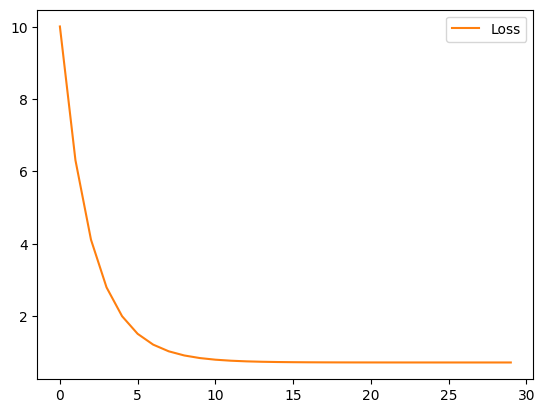

In [12]:
plt.plot(range(len(report.loss)), report.loss, label="Loss", color=colors[1])
plt.legend()
plt.show()

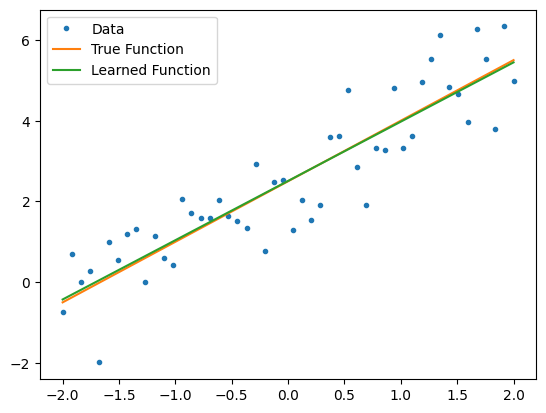

In [13]:
plt.plot(x, y, '.', label="Data", color=colors[0])
plt.plot(x, f(x), label="True Function", color=colors[1])
plt.plot(x, model(x), label="Learned Function", color=colors[2])
plt.legend()
plt.show()

# Same with Keras

## Define Model

In [22]:
class KerasModel(tf.keras.Model):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.w = tf.Variable(0.0, name="w")
        self.b = tf.Variable(0.0, name="b")
    
    def call(self, x):
        return self.w * x + self.b
    
model = KerasModel()
print(model.trainable_variables)

[<tf.Variable 'w:0' shape=() dtype=float32, numpy=0.0>, <tf.Variable 'b:0' shape=() dtype=float32, numpy=0.0>]


## Train Model

Let's train with already existing train loop:

In [15]:
epochs = 30
model = KerasModel()
report = train_loop(model, x, y, epochs=epochs)

## Display Results

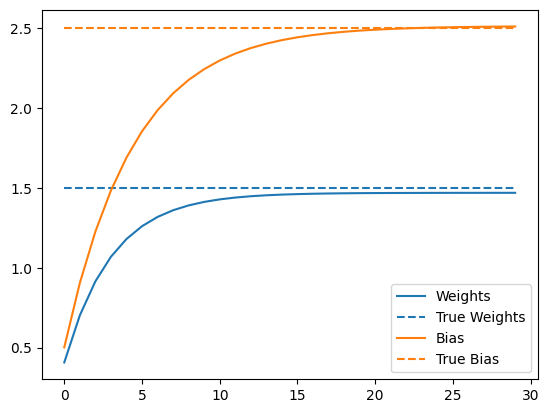

In [16]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.plot(range(epochs), report.w, label="Weights", color=colors[0])
plt.plot(range(epochs), [f.w]*epochs, "--", label="True Weights", color=colors[0])
plt.plot(range(epochs), report.b, label="Bias", color=colors[1])
plt.plot(range(epochs), [f.b]*epochs, "--", label="True Bias", color=colors[1])
plt.legend()
plt.show()

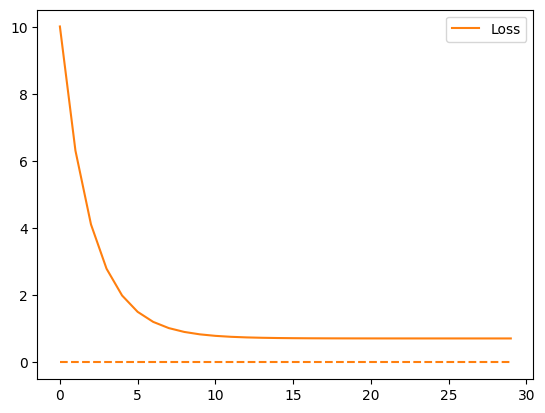

In [17]:
epochs = len(report.loss)
plt.plot(range(epochs), report.loss, label="Loss", color=colors[1])
plt.plot(range(epochs), [0.0]*epochs, '--', color=colors[1])
plt.legend()
plt.show()

**NOTE**: Hmmm.... The result converges to non-zero value. Interesting! Is there a theorem limiting this?

Ah, I got it! This is because of noise, which is never perfectly fitted by the function. This is perfectly OK!

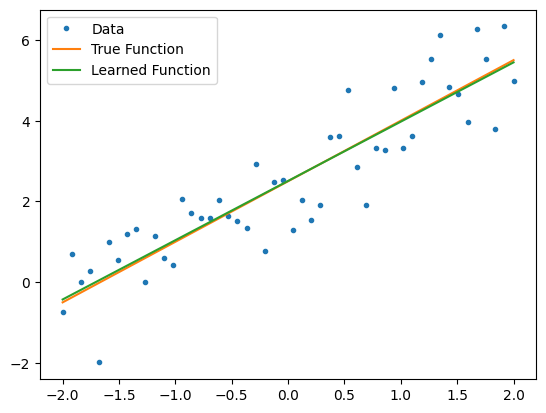

In [18]:
plt.plot(x, y, '.', label="Data", color=colors[0])
plt.plot(x, f(x), label="True Function", color=colors[1])
plt.plot(x, model(x), label="Learned Function", color=colors[2])
plt.legend()
plt.show()

Lets make visualization code reusable. 

In [19]:
def draw_results(report, f, x, y, model):
    epochs = len(report.loss)
    
    # Draw params
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    plt.plot(range(epochs), report.w, label="Weights", color=colors[0])
    plt.plot(range(epochs), [f.w]*epochs, "--", label="True Weights", color=colors[0])
    plt.plot(range(epochs), report.b, label="Bias", color=colors[1])
    plt.plot(range(epochs), [f.b]*epochs, "--", label="True Bias", color=colors[1])
    plt.legend()
    plt.show()
    
    # Draw loss
    plt.plot(range(epochs), report.loss, label="Loss", color=colors[1])
    plt.plot(range(epochs), [0.0]*epochs, '--', color=colors[1])
    plt.legend()
    plt.show()
    
    # Draw the fitted model
    plt.plot(x, y, '.', label="Data", color=colors[0])
    plt.plot(x, f(x), label="True Function", color=colors[1])
    plt.plot(x, model(x), label="Learned Function", color=colors[2])
    plt.legend()
    plt.show()

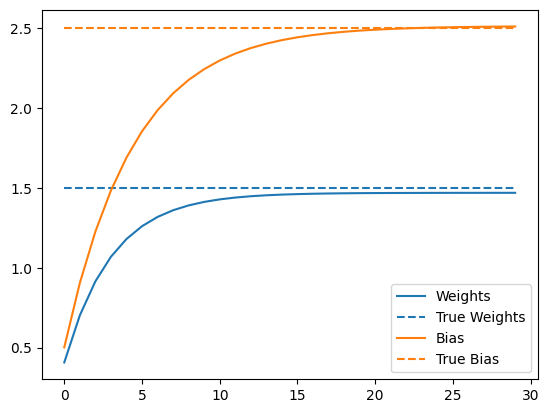

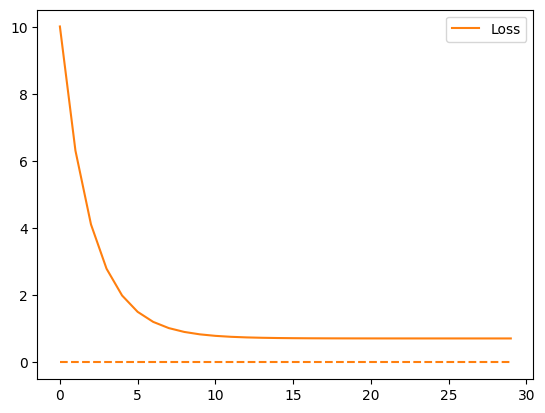

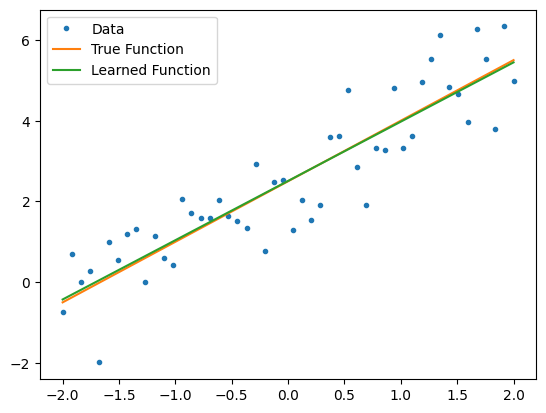

In [20]:
draw_results(report, f, x, y, model)

## Use Keras Built-in Training Loop



In [23]:
model = KerasModel()


model.compile(
    run_eagerly=False,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1),
    loss=tf.keras.losses.mean_squared_error,
)

model.fit(x, y, epochs=30, batch_size=len(x))

Epoch 1/30
1/1 [==============================] - 0s 130ms/step - loss: 10.0121
Epoch 2/30
1/1 [==============================] - 0s 1ms/step - loss: 6.3124
Epoch 3/30
1/1 [==============================] - 0s 2ms/step - loss: 4.1134
Epoch 4/30
1/1 [==============================] - 0s 1ms/step - loss: 2.7942
Epoch 5/30
1/1 [==============================] - 0s 885us/step - loss: 1.9959
Epoch 6/30
1/1 [==============================] - 0s 984us/step - loss: 1.5090
Epoch 7/30
1/1 [==============================] - 0s 1ms/step - loss: 1.2099
Epoch 8/30
1/1 [==============================] - 0s 988us/step - loss: 1.0250
Epoch 9/30
1/1 [==============================] - 0s 938us/step - loss: 0.9101
Epoch 10/30
1/1 [==============================] - 0s 1ms/step - loss: 0.8383
Epoch 11/30
1/1 [==============================] - 0s 885us/step - loss: 0.7933
Epoch 12/30
1/1 [==============================] - 0s 1ms/step - loss: 0.7650
Epoch 13/30
1/1 [==============================] - 0s 1ms/st

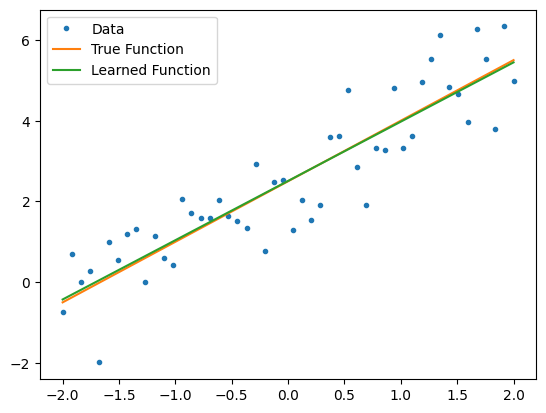

In [24]:
plt.plot(x, y, '.', label="Data", color=colors[0])
plt.plot(x, f(x), label="True Function", color=colors[1])
plt.plot(x, model(x), label="Learned Function", color=colors[2])
plt.legend()
plt.show()